In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['louisbourg', 'ushuaia', 'sola', 'east london', 'clyde river', 'port alfred', 'airai', 'katsuura', 'arlit', 'upernavik', 'hilo', 'punta arenas', 'belushya guba', 'mutum', 'carnarvon', 'dalaba', 'broken hill', 'seydi', 'jamestown', 'butaritari', 'kapaa', 'kamenskoye', 'nagato', 'isangel', 'palabuhanratu', 'qaanaaq', 'nehe', 'newport', 'yichang', 'cherskiy', 'biu', 'sechura', 'port elizabeth', 'rikitea', 'bonthe', 'beyneu', 'nyrob', 'taolanaro', 'panjakent', 'rawson', 'fosses', 'ribeira grande', 'illoqqortoormiut', 'cape town', 'tuatapere', 'flinders', 'caravelas', 'chuy', 'west wendover', 'cidreira', 'bluff', 'peniche', 'mataura', 'atuona', 'sitka', 'andevoranto', 'mount isa', 'amderma', 'new norfolk', 'albany', 'tocopilla', 'tsihombe', 'fevralsk', 'georgetown', 'saint-philippe', 'barrow', 'ruatoria', 'pevek', 'porbandar', 'vaitupu', 'narsaq', 'puerto ayacucho', 'vestmannaeyjar', 'akdepe', 'margate', 'sao joao da barra', 'ribas do rio pardo', 'bontang', 'busselton', 'puerto cabezas', '

## Perform API Calls

In [63]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

query = f"{url}&q="



latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []





for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    #temperature.append(response["main"]["temp"])
    #wind.append(response["wind"]["speed"])
    #humidity.append(response["main"]["humidity"])
    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        
    except KeyError:
        latitude.append(np.nan)
        longitude.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
    #try:
        #cloudiness.append(response['clouds']['all'])
    #except KeyError:
        #cloudiness.append(0)    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]}")

weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Temp": temperature,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                          })
        
    
        

Processing record 1 | louisbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=louisbourg
Processing record 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=ushuaia
Processing record 3 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=sola
Processing record 4 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=east london
Processing record 5 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=clyde river
Processing record 6 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=port alfred
Processing record 7 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q

Processing record 59 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=new norfolk
Processing record 60 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=albany
Processing record 61 | tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=tocopilla
Processing record 62 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=tsihombe
Processing record 63 | fevralsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=fevralsk
Processing record 64 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=georgetown
Processing record 65 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b72

Processing record 117 | jiwani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=jiwani
Processing record 118 | ypsonas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=ypsonas
Processing record 119 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=yellowknife
Processing record 120 | taybad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=taybad
Processing record 121 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=mount gambier
Processing record 122 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=thinadhoo
Processing record 123 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67

Processing record 173 | manyana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=manyana
Processing record 174 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=tasiilaq
Processing record 175 | aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=aksu
Processing record 176 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=mar del plata
Processing record 177 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=nizhneyansk
Processing record 178 | sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=sambava
Processing record 179 | linqiong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a1

Processing record 232 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=luderitz
Processing record 233 | nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=nanakuli
Processing record 234 | bowen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=bowen
Processing record 235 | adre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=adre
Processing record 236 | tharrawaddy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=tharrawaddy
Processing record 237 | adet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=adet
Processing record 238 | tunduru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=tunduru
Pro

Processing record 291 | pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=pangkalanbuun
Processing record 292 | lujan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=lujan
Processing record 293 | odweyne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=odweyne
Processing record 294 | satitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=satitoa
Processing record 295 | bakchar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=bakchar
Processing record 296 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=nanortalik
Processing record 297 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137a

Processing record 349 | zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=zapolyarnyy
Processing record 350 | dunhua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=dunhua
Processing record 351 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=svetlogorsk
Processing record 352 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=saleaula
Processing record 353 | panikian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=panikian
Processing record 354 | kachiry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=kachiry
Processing record 355 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a

Processing record 407 | ariyalur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=ariyalur
Processing record 408 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=bengkulu
Processing record 409 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=bethel
Processing record 410 | santa luzia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=santa luzia
Processing record 411 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=bathsheba
Processing record 412 | alotau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=alotau
Processing record 413 | cabinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac8

Processing record 464 | barawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=barawe
Processing record 465 | ziro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=ziro
Processing record 466 | stonewall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=stonewall
Processing record 467 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=dhidhdhoo
Processing record 468 | eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=eyl
Processing record 469 | nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=nabire
Processing record 470 | juneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=juneau
Processing 

Processing record 521 | borovskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=borovskoy
Processing record 522 | thul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=thul
Processing record 523 | portsmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=portsmouth
Processing record 524 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=kuche
Processing record 525 | berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=berdigestyakh
Processing record 526 | havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=havelock
Processing record 527 | sasykoli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137

Processing record 580 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=sept-iles
Processing record 581 | shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=shache
Processing record 582 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=tumannyy
Processing record 583 | inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=inta
Processing record 584 | mazyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=mazyr
Processing record 585 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=zhangjiakou
Processing record 586 | eagle pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e0273004a36ff6a67b726a137ac829&q=ea

In [70]:
weather_df = weather_df.dropna(how='any')
weather_df.head()

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
1,ushuaia,-54.81,-68.31,43.81,52.0,0.0,9.66
2,sola,58.89,5.65,53.60,81.0,75.0,14.99
3,east london,-33.02,27.91,57.20,76.0,0.0,3.36
4,clyde river,70.47,-68.59,26.60,73.0,75.0,3.36
5,port alfred,-33.59,26.89,63.82,88.0,0.0,6.98


In [86]:
weather_df.to_csv("cities.csv")

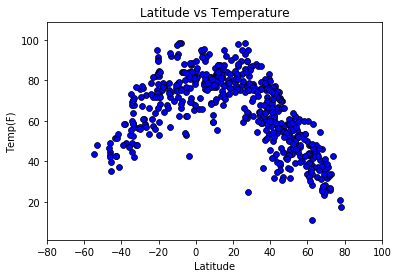

In [84]:

plt.scatter(x = weather_df['Latitude'], y = weather_df['Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)


plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temp(F)")


plt.xlim(-80,100)
plt.ylim(min(weather_df['Temp']) - 10, max(weather_df['Temp']) + 10)


plt.show()

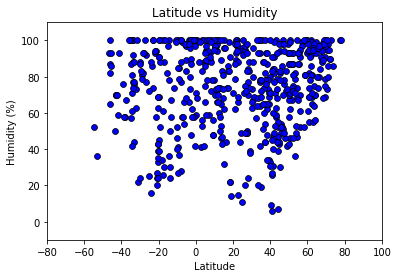

In [83]:
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

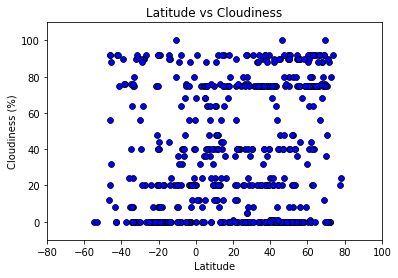

In [82]:

plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.title(f"Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

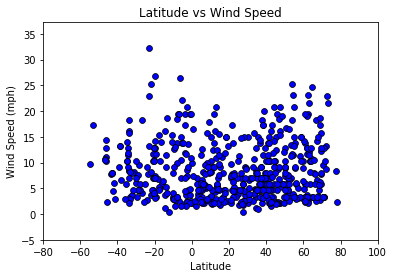

In [81]:
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

plt.title(f"Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)


plt.show()